# python end project

In [ ]:
# This is a dataset from ABC company, consisting of 458 rows and 9 columns.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data=pd.read_excel("myexcel.xlsx")#loaded the data after the preprocessing step
print(data)

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     151     180   
1      Jae Crowder  Boston Celtics      99       SF   25     177     235   
2     John Holland  Boston Celtics      30       SG   27     155     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     173     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     171     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     168     203   
454      Raul Neto       Utah Jazz      25       PG   24     164     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     164     256   
456    Jeff Withey       Utah Jazz      24        C   26     176     231   
457       Priyanka       Utah Jazz      34        C   25     172     231   

               College    Salary  
0                Texas   7730337  
1            Marq

In [ ]:
# 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [12]:
import pandas as pd

# Group by team and count the number of employees in each team
team_distribution = data['Team'].value_counts()

# Calculate the percentage split
team_percentage = (team_distribution / len(data)) * 100

# Combine counts and percentages into a single DataFrame for clarity
team_summary = pd.DataFrame({
    'Employee Count': team_distribution,
    'Percentage (%)': team_percentage
}).reset_index()

team_summary.columns = ['Team', 'Employee Count', 'Percentage (%)']

# Display the results
print("Team Distribution Summary:")
print(team_summary)

Team Distribution Summary:
                      Team  Employee Count  Percentage (%)
0     New Orleans Pelicans              19        4.148472
1        Memphis Grizzlies              18        3.930131
2                Utah Jazz              16        3.493450
3          New York Knicks              16        3.493450
4          Milwaukee Bucks              16        3.493450
5            Brooklyn Nets              15        3.275109
6   Portland Trail Blazers              15        3.275109
7    Oklahoma City Thunder              15        3.275109
8           Denver Nuggets              15        3.275109
9       Washington Wizards              15        3.275109
10              Miami Heat              15        3.275109
11       Charlotte Hornets              15        3.275109
12           Atlanta Hawks              15        3.275109
13       San Antonio Spurs              15        3.275109
14         Houston Rockets              15        3.275109
15          Boston Celtics   

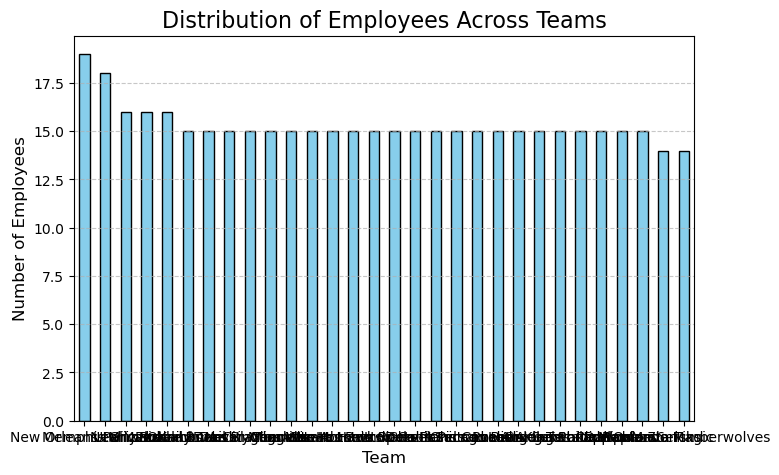

In [31]:
 # Ploting the distribution as a bar chart
plt.figure(figsize=(8, 5))
team_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Employees Across Teams', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 2. Segregate employees based on their positions within the company.

In [25]:
position=data['Position']
# Group employees by their positions
position_distribution = data.groupby('Position').size()

# Display the segregated data
print("Employees segregated by their positions:")
print(position_distribution)


Employees segregated by their positions:
Position
C      79
PF    100
PG     92
SF     85
SG    102
dtype: int64


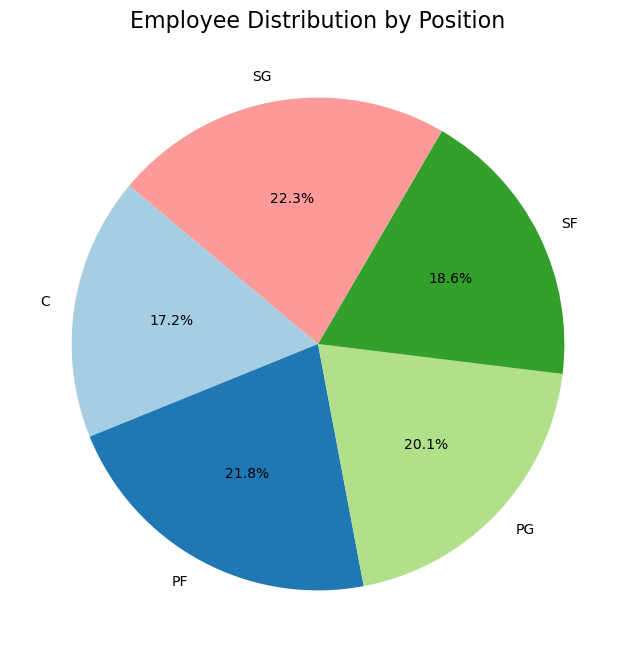

In [32]:
# plotting the segregation using pie chart
plt.figure(figsize=(8, 8))
position_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Employee Distribution by Position', fontsize=16)
plt.ylabel('')  # Remove the y-label for a cleaner pie chart
plt.show()

In [ ]:
# 3. Identify the predominant age group among employees.

In [26]:
# Define age group bins and labels
bins = [0, 25, 35, 45]  # Age ranges: 0-25, 26-35, 36-45
labels = ['18-25', '26-35', '36-45']

# Add an 'age_group' column to the DataFrame
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)


# Count the number of employees in each age group
age_group_distribution = data['age_group'].value_counts()

# Identify the predominant age group
predominant_age_group = age_group_distribution.idxmax()

# Display the results
print("Age Group Distribution:")
print(age_group_distribution)

print("\nThe predominant age group is:", predominant_age_group)

Age Group Distribution:
age_group
26-35    235
18-25    200
36-45     23
Name: count, dtype: int64

The predominant age group is: 26-35


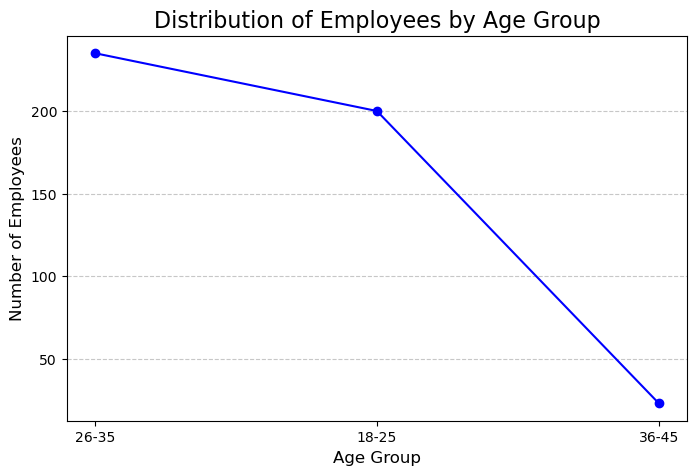

In [33]:
# Plot the age group distribution as a line plot
plt.figure(figsize=(8, 5))
plt.plot(age_group_distribution.index, age_group_distribution.values, marker='o', linestyle='-', color='blue')
plt.title('Distribution of Employees by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 4. Discover which team and position have the highest salary expenditure. 

In [36]:
# Calculate the total salary expenditure by team and position
team_position_salary = data.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

# Identify the team and position with the highest salary expenditure
max_salary_row = team_position_salary.loc[team_position_salary['Salary'].idxmax()]

# Display the results
print("Team and Position with the Highest Salary Expenditure:")
print(max_salary_row)

Team and Position with the Highest Salary Expenditure:
Team        Memphis Grizzlies
Position                   PG
Salary              172289328
Name: 71, dtype: object


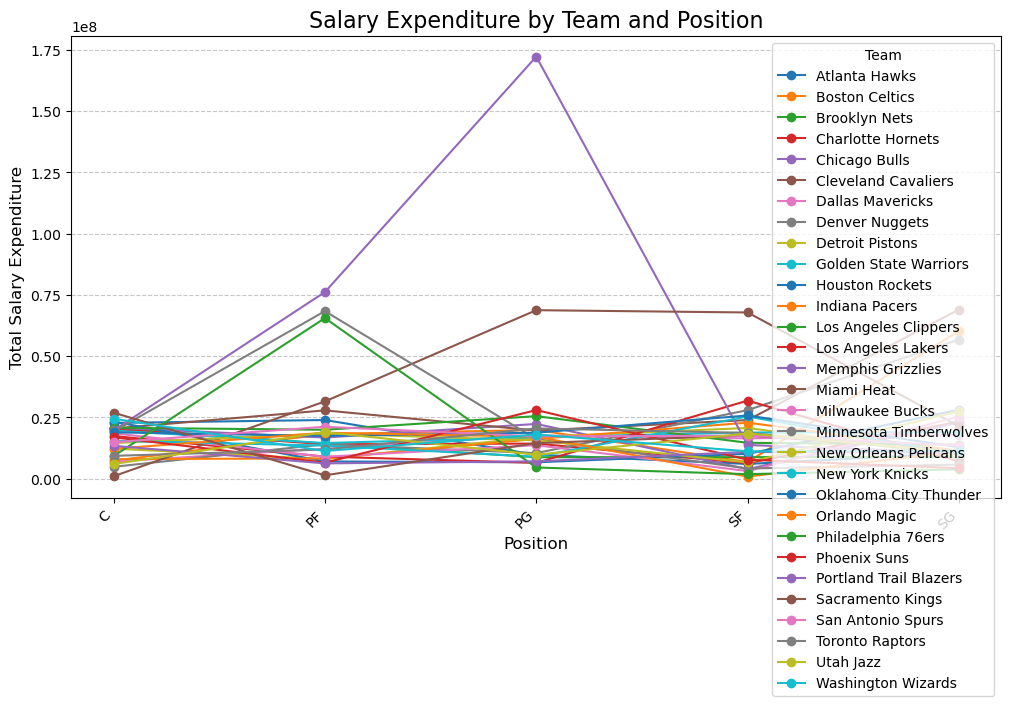

In [37]:
# Plot the salary expenditure by team and position
plt.figure(figsize=(12, 6))
for team in team_position_salary['Team'].unique():
    team_data = team_position_salary[team_position_salary['Team'] == team]
    plt.plot(team_data['Position'], team_data['Salary'], marker='o', label=team)

plt.title('Salary Expenditure by Team and Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Total Salary Expenditure', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Team')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 5. Investigate if there's any correlation between age and salary, and represent it visually.

Correlation between age and salary: 0.14


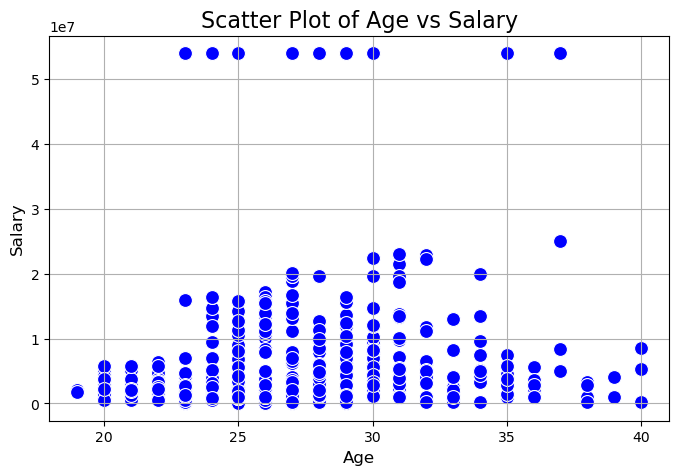

In [30]:
# Calculate the correlation coefficient
correlation = data['Age'].corr(data['Salary'])

# Display the correlation value
print(f"Correlation between age and salary: {correlation:.2f}")

# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Salary', data=data, color='blue', s=100)
plt.title('Scatter Plot of Age vs Salary', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# 6. Provide insights gained from the analysis, highlighting key trends, patterns, and correlations within the dataset.

## 1. Team and Position with Highest Salary Expenditure:

1.Memphis Grizzlies-PG appears to have the highest salary expenditure which makes sense as memphis grizzlies has the employees with high salary 
2.The Memphis Grizzlies have the highest total salary expenditure among all teams.
3.Point Guards (PG) contribute the most to this team's salary expenditure.
4.The high salary expenditure for Point Guards on the Memphis Grizzlies suggests that the team has invested heavily in this position, likely reflecting
the importance of this role in their strategy.


## 2. Employee Distribution Across Teams:

1.Concentration of Employees:

A significant portion of the dataset is concentrated in teams with 15 or 16 employees (teams like Boston Celtics, San Antonio Spurs, Houston Rockets,
etc.). This might indicate a fairly even distribution of employees across teams, with a slight tendency for teams like New Orleans Pelicans and
Memphis Grizzlies to have a few more employees

2.Percentage Split:

The percentage split is quite consistent across teams, with most teams contributing around 3% to the overall employee count. This could suggest that
the data represents an evenly distributed dataset across most teams.

## 3. Segregation of Employees Based on Positions:

1.Distribution:

Shooting Guards (SG): 102 employees (largest group).
Power Forwards (PF): 100 employees.
Point Guards (PG): 92 employees.
Small Forwards (SF): 85 employees.
Centers (C): 79 employees (smallest group).

2.Insights:

Shooting Guards (SG) represent the largest group of employees, which could suggest that this position has a higher recruitment focus.
Centers (C) are the smallest group, likely due to the specialized skills and physical requirements for this role.
Power Forwards (PF) are almost equal to Shooting Guards (SG) in numbers, indicating their importance in team composition.

## 4. Age Group Insights: 

Distribution Details:

1.Age Group 26-35: 235 employees (predominant age group).
2.Age Group 18-25: 200 employees
3.Age Group 36-45: 23 employees (smallest group).

Insights:

The majority of employees fall within the 26-35 age group, indicating that the workforce is predominantly mid-career professionals.
The 18-25 age group is the second-largest, representing a significant number of early-career employees or recent graduates.
The 36-45 age group is the smallest, suggesting fewer senior or experienced professionals in the workforce.
The correlation coefficient between age and salary is 0.14, indicating a weak positive correlation.
This suggests that as age increases, salary tends to increase slightly, but the relationship is not strong.


## 5. Salary insight:

Highest Salary Expenditure: The Memphis Grizzlies have the highest salary expenditure among all teams, particularly for the Point Guard (PG) position.
Player Salaries: While there is a slight positive correlation between age and salary (correlation = 0.14), salary is more heavily influenced by factors such as team, position, and player performance rather than age alone.

## 6. Physical Attributes


Players' height and weight are closely tied to their positions: Centers (C) and Power Forwards (PF) tend to be taller and heavier. Point Guards (PG) and Shooting Guards (SG) are shorter and leaner, reflecting their need for speed and agility.

## Key Trends and Patterns
Teams heavily invest in top positions (like PG and SG), reflecting their importance in game strategies.
Younger players (18-25) form a significant part of the workforce, but the majority (26-35) are mid-career athletes.
Salary distribution indicates disparities influenced by position and team, rather than uniform age-based increments.